In [28]:
pip install --user googlemaps requests pandas numpy matplotlib openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('data/NYC_museums.csv')
df.head()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.oldnycustomhouse.gov/,1 Bowling Grn,NaN,New York,"10,004"
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,(718) 816-4506,http://www.aliceausten.org/,2 Hylan Blvd,NaN,Staten Island,"10,305"
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,(212) 368-5900,http://www.artsandletters.org/,633 W. 155th St.,NaN,New York,"10,032"
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,(212) 265-1040,http://www.folkartmuseum.org/,45 West 53rd Street,NaN,New York,"10,019"
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,(212) 363-3200,http://www.ellisisland.org/,Ellis Island,NaN,New York,0


In [52]:
df.columns

Index(['the_geom', 'NAME', 'TEL', 'URL', 'ADRESS1', 'ADDRESS2', 'CITY', 'ZIP'], dtype='object')

In [53]:
df.describe()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP
count,130,130,128,130,130,15,130,130
unique,130,130,123,129,123,15,7,59
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.ellisisland.org/,15 W. 16th St.,11th Floor,New York,"10,011"
freq,1,1,2,2,6,1,89,9


In [54]:
# Only need name and location
cols = [
    "the_geom",
    "NAME"
]

df = df[cols].dropna()
df.head()

,the_geom,NAME
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center


In [55]:
df.describe()

,the_geom,NAME
count,130,130
unique,130,130
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
freq,1,1


In [56]:
df = df.rename(columns={
    "NAME": "name",
    "ADDRESS2": "address",
})

In [58]:
coords = (
    df["the_geom"]
    .str.replace("POINT (", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.split(" ", expand=True)
)

df["lon"] = coords[0].astype(float)
df["lat"] = coords[1].astype(float)

df[["lat", "lon"]].head()

,lat,lon
0,40.703816,-74.013756
1,40.615121,-74.063032
2,40.833854,-73.947298
3,40.761625,-73.978103
4,40.699056,-74.039685


In [63]:
df = df.drop(columns=["the_geom"])

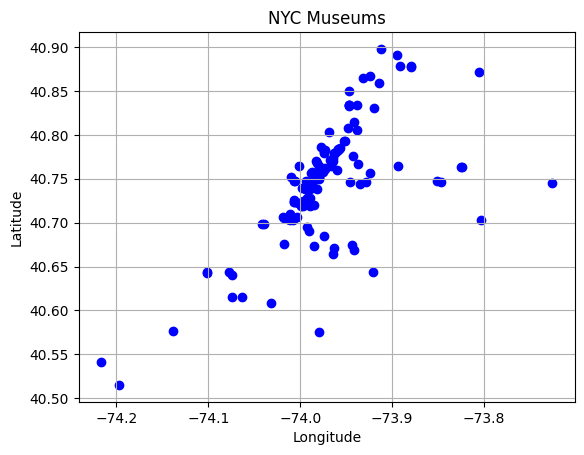

In [64]:
import matplotlib.pyplot as plt

plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
plt.grid()
plt.show()

In [ ]:
start_lat = input("Enter your starting address latitude: ")
start_lon = input("Enter your starting address longitude: ")